In [23]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_lfw_people
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
import numpy as np
import os,cv2

def plot_gallery(images, titles, h, w, n_rows=3, n_col=4):
    plt.figure(figsize=(1.8*n_col,2.4*n_rows))
    plt.subplots_adjust(bottom=0, left=0.1, right=.99, top=.90, hspace=.35)
    for i in range(n_rows*n_col):
        plt.subplot(n_rows, n_col, i+1)
        plt.imshow(images[i].reshape((h,w)),cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())
        

In [24]:
dir_name=r"C:\Users\rabin\Desktop\INTERNSHIP\Internship_Studio\PROJECT\dataset\faces"
y=[];X=[];target_names=[]
person_id=0;h=w=300
n_samples=0
class_names=[]
for person_name in os.listdir(dir_name):
    #print(person_name)
    dir_path = os.path.join(dir_name, person_name) #dir_path=dir_name+person_name+"/"
    class_names.append(person_name)
    for image_name in os.listdir(dir_path):
        #formulate the image path
        image_path = os.path.join(dir_path, image_name) #image_path=dir_path+image_name
        #read tthe input image
        img=cv2.imread(image_path)
        # Convert into grayscale
        gray=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        # resize image to 300*300 dimension
        resized_image=cv2.resize(gray,(h,w))
        # convert matrix to vector
        v=resized_image.flatten()
        X.append(v)
        # increase the number of samples
        n_samples=n_samples+1
        # Adding  the  categorical label
        y.append(person_id)
        # adding the person name
        target_names.append(person_name)
    # Increase the person id by 1
    person_id=person_id+1

#transform list to numpy array
y=np.array(y)
X=np.array(X)
target_names=np.array(target_names)
n_features=X.shape[1]
print(y.shape, X.shape, target_names.shape)
print("Number of samples:", n_samples)

n_classes=target_names.shape[0]
print("Total datset size:")
print("n_samples: %d" % n_samples)
print("n_samples: %d" % n_features)
print("n_samples: %d" % n_classes)
        

(450,) (450, 90000) (450,)
Number of samples: 450
Total datset size:
n_samples: 450
n_samples: 90000
n_samples: 450


Extracting the top 150 eigenfaces from 337 faces


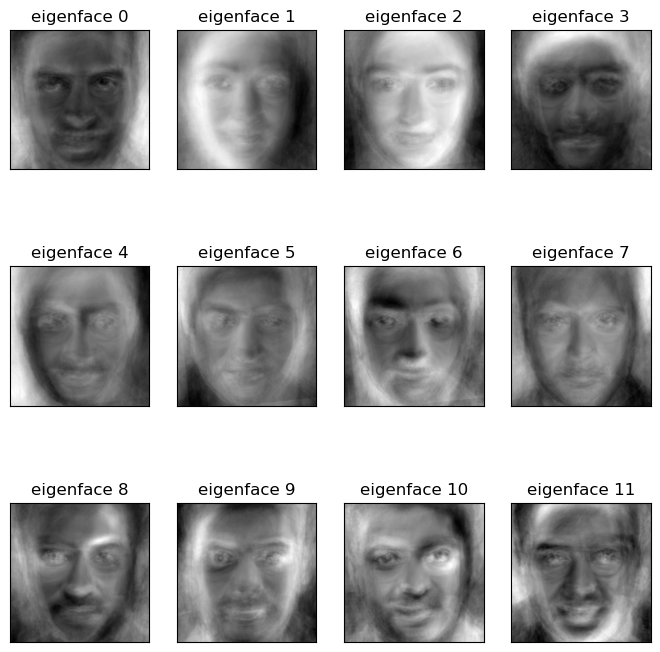

projecting the input data on the eigenfaces orthonormal basis
(337, 150) (113, 150)
Done


In [26]:
#split into training and testing set
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)
#compute PCA (eigenfaces) on the face dataset (treated as unlabeled dataset):unsupervised feature extraction/dimensionality reduction
n_components=150
print("Extracting the top %d eigenfaces from %d faces"%(n_components,X_train.shape[0]))
#Applying PCA
pca=PCA(n_components=n_components, svd_solver='randomized',whiten=True).fit(X_train)
#Generating eigen faces
eigenfaces=pca.components_.reshape((n_components, h, w))

#ploting the gallery of the most significative eigenfaces
eigenface_titles=["eigenface %d" % i for i in range(eigenfaces.shape[0])]
plot_gallery(eigenfaces,eigenface_titles, h, w)

plt.show()

print("projecting the input data on the eigenfaces orthonormal basis")
X_train_pca=pca.transform(X_train)
X_test_pca=pca.transform(X_test)
print(X_train_pca.shape,X_test_pca.shape)

#compute Fisherfaces
lda=LinearDiscriminantAnalysis()
#Compute LDA of reduced data
lda.fit(X_train_pca,y_train)

X_train_lda=lda.transform(X_train_pca)
X_test_lda=lda.transform(X_test_pca)
print("Done")





In [27]:
#Training with Multi layer perceptron
clf=MLPClassifier(random_state=1, hidden_layer_sizes=(10,10), max_iter=1000, verbose=True).fit(X_train_lda, y_train)
print("Model Weights:")
model_info=[coef.shape for coef in clf.coefs_]
print(model_info)

Iteration 1, loss = 2.47899799
Iteration 2, loss = 2.43698482
Iteration 3, loss = 2.39608602
Iteration 4, loss = 2.35734669
Iteration 5, loss = 2.31958230
Iteration 6, loss = 2.28406528
Iteration 7, loss = 2.24940679
Iteration 8, loss = 2.21614613
Iteration 9, loss = 2.18361894
Iteration 10, loss = 2.15323340
Iteration 11, loss = 2.12305899
Iteration 12, loss = 2.09374818
Iteration 13, loss = 2.06610308
Iteration 14, loss = 2.03869903
Iteration 15, loss = 2.01128770
Iteration 16, loss = 1.98566787
Iteration 17, loss = 1.95934827
Iteration 18, loss = 1.93485489
Iteration 19, loss = 1.91046695
Iteration 20, loss = 1.88560952
Iteration 21, loss = 1.86162104
Iteration 22, loss = 1.83825849
Iteration 23, loss = 1.81416999
Iteration 24, loss = 1.79093575
Iteration 25, loss = 1.76852873
Iteration 26, loss = 1.74541796
Iteration 27, loss = 1.72325301
Iteration 28, loss = 1.70019855
Iteration 29, loss = 1.67812890
Iteration 30, loss = 1.65622233
Iteration 31, loss = 1.63418164
Iteration 32, los

Accuracy: 69.91150442477876


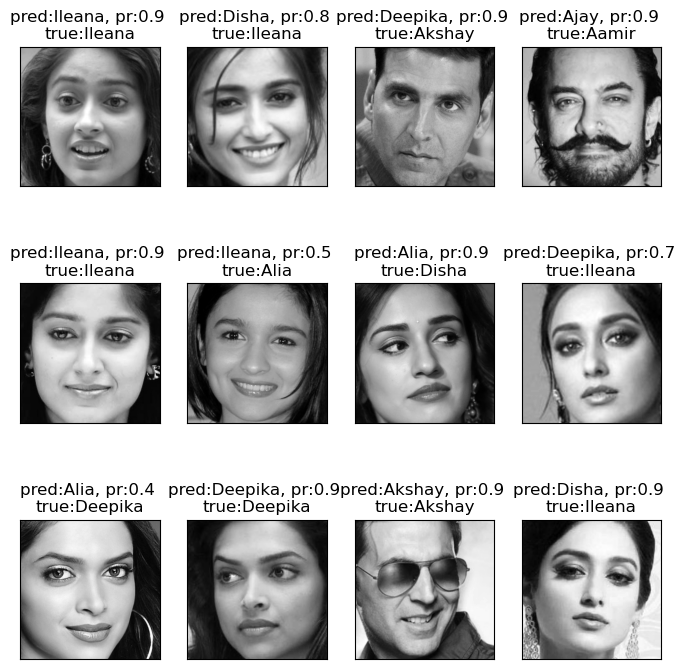

In [28]:
y_pred=[];y_prob=[]
for test_face in X_test_lda:
    prob=clf.predict_proba([test_face])[0]
    #print(prob,np.max(prob))
    class_id=np.where(prob==np.max(prob))[0][0]
    # print(class_index)
    # find the label of the mathed face
    y_pred.append(class_id)
    y_prob.append(np.max(prob))

#Transform the data
y_pred=np.array(y_pred)

prediction_titles=[]
true_positive=0
for i in range(y_pred.shape[0]):
    true_name=class_names[y_test[i]]
    pred_name=class_names[y_pred[i]]
    result='pred:%s, pr:%s \ntrue:%s' %(pred_name, str(y_prob[i])[0:3], true_name)
    prediction_titles.append(result)
    if true_name==pred_name:
        true_positive=true_positive+1

print("Accuracy:",true_positive*100/y_pred.shape[0])

#plot result
plot_gallery(X_test, prediction_titles, h, w)
plt.show()
    